## Домашнее задание "Теория оптимизации"

Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
# функция Экли - функция с большим количеством локальных экстремумов и одним
# глобальным, равным нулю в точке (0, 0)

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# заданы границы значений переменных Х[0] и Х[1]
bounds = [(-10, 10), (-10, 10)]

# глобальный минимум функции с "базовым" набором параметров
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

1) Параметр strategy - это 12 вариантов стратегии оптимизации функции. Их можно разделить на две группы. Одна использует биномиальное распределение (bin), т.е. генерирует случайным образом числа из диапазона [0,1), другая - экспоненциальное распределение (exp) или непрерывное, т.е. числа генерируются последовательно. Все эти числа сравниваются с константой скрещивания (recombination) и определяется: будет ли заменен параметр исходного вектора на мутантный или нет.

In [3]:
# strategy = best1bin ("лучшее решение") используется по умолчанию, количество итераций возьмем из
# результата выше, также посмотрим на:
# best1exp,
# rand1bin ("случайное решение"),
# randtobest1exp ("от случайного к лучшему"),
# randtobest1bin,
# currenttobest1exp ("от текущего к лучшему")

nit_strategy = [result.nit]

var_1 = ['best1exp','rand1bin','randtobest1exp','randtobest1bin','currenttobest1exp']

for i in range(len(var_1)):
    res_1 = differential_evolution(ackley, bounds, strategy=var_1[i], seed=42)
    nit_strategy.append(res_1.nit)
nit_strategy

[90, 147, 168, 156, 101, 1000]

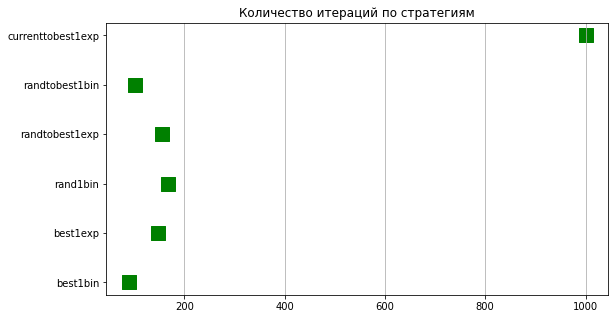

In [4]:
# построим график количества итераций по стратегиям

# составим полный список стратегий
var_1_ = ['best1bin','best1exp','rand1bin','randtobest1exp','randtobest1bin','currenttobest1exp']

plt.figure(figsize=(9,5))
plt.scatter(nit_strategy, var_1_, marker='s', s=200, color='green')

plt.title('Количество итераций по стратегиям')
plt.grid(axis='x')

Наименьшее количество итераций - у best1bin и randtobest1bin, но у первой стратегии - минимальный результат и он лучший.

2) Параметр popsize - это множитель, который влияет на количество рассматриваемых элементов в совокупности, другими словами, - на размер выборки. В расчете он умножается на размерность массива, т.е. для двумерной функции умножается на 2.

In [5]:
# примем для popsize следующие значения:
# 10, 15 (установлен по умолчанию), 20, 25, 30, 35

nit_popsize = []

var_2 = [10, 15, 20, 25, 30, 35]

for j in range(len(var_2)):
    res_2 = differential_evolution(ackley, bounds, popsize=var_2[j], seed=42)
    nit_popsize.append(res_2.nit)
nit_popsize

[97, 90, 95, 94, 99, 96]

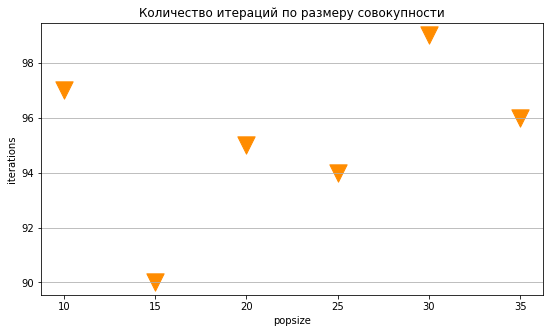

In [6]:
# построим график количества итераций по размеру совокупности

plt.figure(figsize=(9,5))
plt.scatter(var_2, nit_popsize, marker='v', s=300, color='darkorange')

plt.title('Количество итераций по размеру совокупности')
plt.xlabel('popsize')
plt.ylabel('iterations')
plt.grid(axis='y')

При popsize = 15 глобальный минимум функции Экли определяется за наименьшее количество итераций.

3) Параметр tol - это относительная величина допустимого отклонения от результата, влияет на остановку решения задачи.

In [7]:
# посмотрим на количество итераций при tol равном:
# 0.32, 0.30, 0.20, 0.10, 0.01 (установленo по умолчанию), 0.001

nit_tol = []

var_3 = [0.32, 0.30, 0.20, 0.10, 0.01, 0.001]

for l in range(len(var_3)):
    res_3 = differential_evolution(ackley, bounds, tol=var_3[l], seed=42)
    nit_tol.append(res_3.nit)
nit_tol

[1, 90, 90, 90, 90, 90]

Любое значении tol из диапазона (0.30 - 0.001) не меняет количество итераций: **их 90**. Увеличение отклонения дает некорректный результат: вероятность найти глобальный минимум за одну итерацию, учитывая особенности функции Экли, ничтожно мала.

График итераций не строю: не считая "выброс", значение nit единственное.

4) Параметр mutation - это константа мутации или степень мутации вектора, определяющая количество изменений, вносимых в вектор на каждой итерации. Задается в диапазоне $[0,2]$ или в виде кортежа (min,max).

In [8]:
# пусть значение mutation равно:
# 0.2, 0.5 (установлен по умолчанию), 0.8, 1.0, 1.3, 1.9

nit_mutation = []

var_4 = [0.2, 0.5, 0.8, 1.0, 1.3, 1.9]

for k in range(len(var_4)):
    res_4 = differential_evolution(ackley, bounds, mutation=var_4[k], seed=42)
    nit_mutation.append(res_4.nit)
nit_mutation

[28, 57, 104, 138, 216, 246]

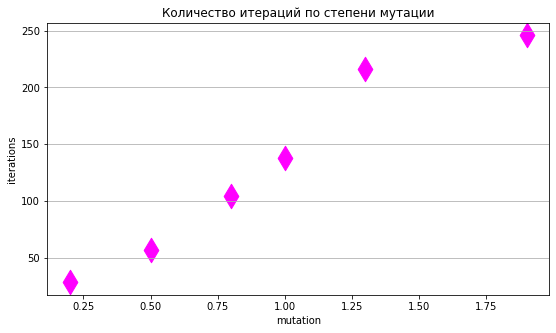

In [9]:
# график количества итераций по степени мутации

plt.figure(figsize=(9,5))
plt.scatter(var_4, nit_mutation, marker='d', s=300, color='magenta')

plt.title('Количество итераций по степени мутации')
plt.xlabel('mutation')
plt.ylabel('iterations')
plt.grid(axis='y')

Увеличение константы мутации расширяет радиус поиска элементов, но одновременно приводит и к снижению скорости нахождения решения: растет число итераций. Очевидно, что приемлемое значение параметра не превышает 0.5, принятого по умолчанию, или ниже его.

5) Параметр recombination - это константа скрещивания, которая определяет какое количество мутантов перейдет в следующую итерацию: чем больше значение параметра, тем больше мутантных элементов включится в новый вектор. Рекомендуемый диапазон - $[0,1]$.

In [10]:
# определим количество итераций при значении recombination равном:
# 0.1, 0.3, 0.5, 0.7 (установлен по умолчанию), 0.9, 1.0

nit_recombination = []

var_5 = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

for m in range(len(var_5)):
    res_5 = differential_evolution(ackley, bounds, recombination=var_5[m], seed=42)
    nit_recombination.append(res_5.nit)
nit_recombination

[126, 108, 107, 90, 85, 82]

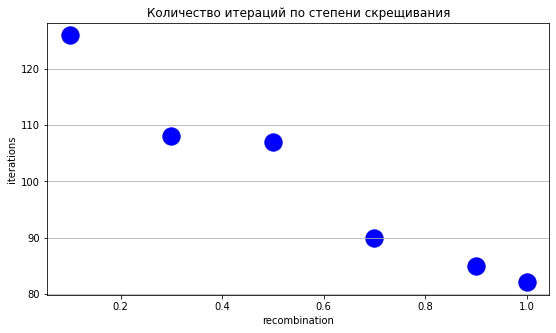

In [11]:
# построим график количества итераций по степени скрещивания

plt.figure(figsize=(9,5))
plt.scatter(var_5, nit_recombination, marker='o', s=300, color='blue')

plt.title('Количество итераций по степени скрещивания')
plt.xlabel('recombination')
plt.ylabel('iterations')
plt.grid(axis='y')

Наглядная картина: чем сильнее скрещиваются вектора, тем меньше требуется итераций для нахождения глобального минимума функции.

6) Параметр updating отвечает за способ обновления вектора наилучшего решения, принимает одно из двух значений:

- если установлено **'immediate'**, то вектор наилучшего решения обновляется постоянно: текущий вектор заменяется лучшим немедленно в рамках одной итерации (параметр установлен по умолчанию),

- если **'deferred'**, то замена происходит один раз в конце после нахождения всех значений функции и их сортировки по возрастанию (берется минимальное значение).

In [12]:
# составим список двух вариантов

var_6 = ['immediate','deferred']

nit_updating = []

for n in range(len(var_6)):
    res_6 = differential_evolution(ackley, bounds, updating=var_6[n], seed=42)
    nit_updating.append(res_6.nit)
nit_updating

[90, 122]

Вариант немедленной замены вектора наилучшим решением приводит к меньшему количеству итераций (их снова 90). График не строю, т.к. всего два значения и выбор оптимального параметра очевиден.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

Значения четырех из шести параметров (strategy, popsize, tol и updating), установленных по умолчанию, определили глобальный минимум функции за одинаковое количество итераций - 90. Это минимальный результат из всех полученных, поэтому эти значения менять не будем.

Значения параметров mutation и recombination, отличные от дефолтных, могут, как показано выше, уменьшить число итераций.

In [13]:
# зададим значения mutation и recombination: первый - минимально возможный, второй - максимально 

res = differential_evolution(ackley, bounds, mutation=0.2, recombination=1.0, seed=42)
res

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 693
     nit: 20
 success: True
       x: array([0., 0.])

Результат получился аналогичным первоначальному, но за меньшее количество итераций - 20. Можно считать, что параметры differential_evolution для функции Экли подобраны оптимально.

При mutation = 0.1 глобальный минимум не определяется, функция "застревает" в одном из локальных экстремумов и за три шага принимает значение **2.5799275570298765**, при том, что должен быть ноль, как известно. Соответственно данное значение параметра не подходит.